#### `Smoothness`

A function $f$ is called $\beta$-`smooth` if its `gradient` is `Lipschitz continuous` with parameter $\beta$

$$\|\nabla f(x) - \nabla f(y)\|_2 \leq \beta \|x-y\|_2$$

That is, gradient doesn't change too much, if $x$ doesn't change much

#### `Quadratic upper bound` for convex function

If a function $f(x)$ (not necessarily convex) is $\beta$-`smooth`, then the following function is convex

$$g(x)=\boxed{\frac{\beta}{2}\|x\|_2^2-f(x)}$$

To show this, recall that `monotone` of gradient $\rightarrow$ convexity, so we look at the gradient of $g(x)$

$$\begin{align*}\langle \nabla g(x) - \nabla g(y), x-y \rangle &=\langle \beta(x-y)-\left(\nabla f(x) - \nabla f(y)\right) , x-y\rangle \,\, \left(\text{plug in} \, g(x)=\frac{\beta}{2}\|x\|_2^2-f(x)\right)\\
&=\beta\|(x-y)\|_2^2-\langle \nabla f(x) - \nabla f(y) , x-y\rangle \\
& \text{(Cauchy-Schwarz) } \langle u, v \rangle \leq \|u\|_2\|v\|_2 \\
&\geq \beta\|(x-y)\|_2^2 - \|\nabla f(x) - \nabla f(y)\|_2\|x-y\|_2 \\
& \left(f(x) \,\text{is } \beta \text{-smooth}\right)\, \|\nabla f(x) - \nabla f(y)\|_2 \leq \beta \|x-y\|_2 \\
& \geq \beta\|(x-y)\|_2^2 - \beta\|(x-y)\|_2^2 \\
& =0
\end{align*}$$

This indicates that $\nabla g(x)$ is `monotone`, so $g(x)$ is convex

With convexity of $g(x)$, we apply the 1st order condition

$$\begin{align*}g(y) & \geq g(x)+\langle \nabla g(x), y-x \rangle \\
& \text{Plug in expressions...} \\
\frac{\beta}{2}\|y\|_2^2-f(y) & \geq \frac{\beta}{2}\|x\|_2^2-f(x) + \langle \beta x -\nabla f(x), y-x \rangle \\
& \text{Rearrange...} \\
f(y) & \leq f(x)+\langle \nabla f(x), y-x \rangle+\frac{\beta}{2}\|y\|_2^2-\beta\langle x, y\rangle-\frac{\beta}{2}\|x\|_2^2 +\beta\|x\|_2^2 \\
&= f(x)+\langle \nabla f(x), y-x \rangle+ \boxed{\frac{\beta}{2}\|y-x\|_2^2}
\end{align*}$$

That is, a differentiable function is $\beta$-`smooth` if at any point it is `upper bounded` by a quadratic function

##### When $f$ is `convex`

$f$ is $\beta$-smooth and convex `if and only if`

$$f(x)+\langle \nabla f(x), y-x \rangle \leq f(y) \leq f(x)+\langle \nabla f(x), y-x \rangle + \frac{\beta}{2}\|y-x\|_2^2$$

and $f$ is twice-differentiable, $\beta$-smooth, and convex `if and only if`

$$0\leq\nabla^2f(x)\leq \beta I$$

#### `Strong convexity`

A function $f$ is `strongly-convex` with parameter $\alpha$ if the following is convex

$$g(x)=\boxed{f(x)-\frac{\alpha}{2}\|x\|_2^2}$$

The convexity of $g(x)$ gives the 1st order condition

$$\begin{align*}g(y) & \geq g(x)+\langle \nabla g(x), y-x \rangle \\
& \text{Plug in expressions...} \\
f(y)-\frac{\alpha}{2}\|y\|_2^2 & \geq f(x)-\frac{\alpha}{2}\|x\|_2^2 + \langle \nabla f(x) - \alpha x , y-x \rangle \\
& \text{Rearrange...} \\
f(y) & \geq f(x)+\langle \nabla f(x), y-x \rangle+\frac{\alpha}{2}\|y\|_2^2-\alpha\langle x, y\rangle-\frac{\alpha}{2}\|x\|_2^2 +\alpha\|x\|_2^2 \\
&= f(x)+\langle \nabla f(x), y-x \rangle+ \boxed{\frac{\alpha}{2}\|y-x\|_2^2}
\end{align*}$$

This is `stronger` than 1st order condition for convexity

$$ f(y) \geq f(x)+\langle \nabla f(x), y-x \rangle$$

as we can at any point fit a quadratic `underneath` $f(x)$

This indicates that the function grows rapidly when far away, or the gradient descent can be rapid when far away from optimal point

Similarly, $f$ is twice-differentiable and $\alpha$-strongly convex `if and only if`

$$\nabla^2f(x)\geq \alpha I$$

that is, `all eigenvalues of Hessian are lower bounded by` $\alpha$

#### `Illustration` of quadratic upper and lower bound

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

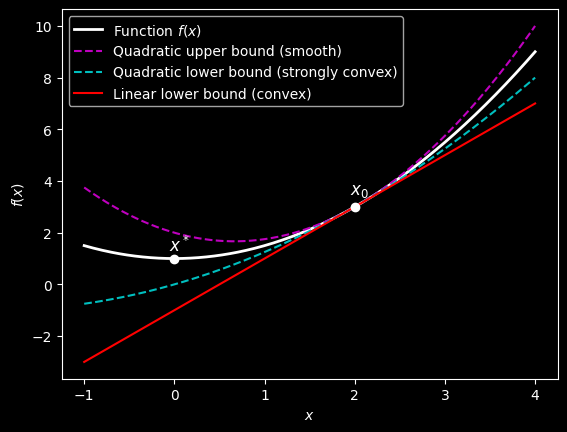

In [ ]:
def f(x):
    return 0.5 * x**2 + 1

def grad_f(x):
    return x

def upper_bound_example(x, x_0, beta):
    return f(x_0) + grad_f(x_0) * (x - x_0) + 0.5 * beta* (x - x_0)**2

def lower_bound_example(x, x_0, alpha):
    return f(x_0) + grad_f(x_0) * (x - x_0) + 0.5 * alpha * (x - x_0)**2

def linear_approx_example(x, x_0):
    return f(x_0) + grad_f(x_0) * (x - x_0)

x_0 = 2.0
alpha = 0.5
beta= 1.5

x = np.linspace(-1, 4, 400)

plt.plot(x, f(x), label="Function $f(x)$", color='w', linewidth=2)
plt.plot(x, upper_bound_example(x, x_0, beta), label="Quadratic upper bound (smooth)", linestyle='--', color='m')
plt.plot(x, lower_bound_example(x, x_0, alpha), label="Quadratic lower bound (strongly convex)", linestyle='--', color='c')
plt.plot(x, linear_approx_example(x, x_0), label="Linear lower bound (convex)", linestyle='-', color='r')

plt.scatter(x_0, f(x_0), color='w', zorder=5)
plt.text(x_0, f(x_0)+0.5, '  $x_0$', horizontalalignment='center', fontsize=12, color='w')

plt.scatter(0, 1, color='w', zorder=5)
plt.text(0, 1.3, '  $x^*$', horizontalalignment='center', fontsize=12, color='w')

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

#### Examples

##### Strongly convex but not smooth

Maximum of two quadratics

##### Smoothly convex but not strongly convex

A quadratic in the middle, and linear on each side